Simple Circuit For Taking Measurements  
===============

First we need to bring in the Qiskit modules which give us the ability to simulate quantum machines, communicate with quantum machine at IBM, and visualize our quantum circuits

In [ ]:
# bring in necessary modules
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram


Now we need to setup the number of bits we want in our system

In [ ]:
# number of quantum bits 
n_qbits = 9


Next we create a quantum circuit. This is done by using the QuantumCircuit constructor provided by Qiskit. The first parameter represents the number of quantum bits and the second parameter the number of classical bits to initialize in the system.

In the circuit we go on to measure our quantum bits. We will essentially be introducing measurements along each wire (where we can think of a wire starting at each quantum bit). We use the `measure(input, output)` function to measure a quantum state `input` onto a classical bit `output`. 

You may notice that we are not passing in actual bit objects or references but instead just integers. This is because our system indexes the bits and we can reference with 0-based integer indexing.

In [111]:
def measurement_circuit(n_qbits):
    '''
        This method creates a measurement circuit based off of the
        n_qbits paramter which specifies the number of qbits to use 
    '''
    # create the quantum circuit
    measurement_circuit = QuantumCircuit(n_qbits, n_qbits)
    
    # loop through and measure each qbit into the classical bits
    for i in range(n_qbits): 
        # add measurement gates for all input to all output
        measurement_circuit.measure(i, i)
    return measurement_circuit

# call the method
measurement_circuit = measurement_circuit(n_qbits)
# show the circuit
measurement_circuit.draw()

┌─┐                        
q_0: ┤M├────────────────────────
     └╥┘┌─┐                     
q_1: ─╫─┤M├─────────────────────
      ║ └╥┘┌─┐                  
q_2: ─╫──╫─┤M├──────────────────
      ║  ║ └╥┘┌─┐               
q_3: ─╫──╫──╫─┤M├───────────────
      ║  ║  ║ └╥┘┌─┐            
q_4: ─╫──╫──╫──╫─┤M├────────────
      ║  ║  ║  ║ └╥┘┌─┐         
q_5: ─╫──╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║  ║ └╥┘┌─┐      
q_6: ─╫──╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_8: ─╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 9/═╩══╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7  8

Our circuit is now setup, now we can begin executing! There are a few ways to execute, including sending your algorithm off to IBM Quantum machines to run. The way to control this is through the backend parameter. For now we are just going to run on the quantum assembly simulator (local).


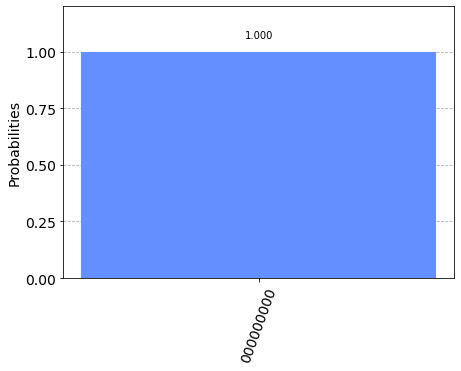

In [112]:
counts = execute(measurement_circuit,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


#### Analyzing our Output

Our output is all 0 since quantum bits are always initialized to have a value of 0. We also see P(0) = 1.0, this is only going to happen on a PERFECT quantum computer. We are by no means at that point in the evolution of the technology yet, so we can send this off to IBM Quantum and its highly unlikely that we get this kind of result.}

 

### Encoding an input

To encode inputs, we need to bring in not gates, not gates simply flip bits. for qubits, we can just use the operation `circuit.x(index)`, where index is the index of the qubit that youd like to apply the not gate to. 

In [113]:
encoding_circuit = QuantumCircuit(n_qbits)

# add the not gate to the last qubit (index 7) 
encoding_circuit.x(8)

# draw the gate
encoding_circuit.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
          
q_7: ─────
     ┌───┐
q_8: ┤ X ├
     └───┘

We have now begun to create a circuit that will be able to add numbers, but we are still going to need to measure the result! This is where we can use the previous circuit to have our algorithm consist of the result of both circuits in sequence! 

In [114]:
# create whole circuit 
complete_circuit = encoding_circuit + measurement_circuit

# draw
complete_circuit.draw()

┌─┐                        
q_0: ─────┤M├────────────────────────
          └╥┘┌─┐                     
q_1: ──────╫─┤M├─────────────────────
           ║ └╥┘┌─┐                  
q_2: ──────╫──╫─┤M├──────────────────
           ║  ║ └╥┘┌─┐               
q_3: ──────╫──╫──╫─┤M├───────────────
           ║  ║  ║ └╥┘┌─┐            
q_4: ──────╫──╫──╫──╫─┤M├────────────
           ║  ║  ║  ║ └╥┘┌─┐         
q_5: ──────╫──╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║  ║ └╥┘┌─┐      
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_7: ──────╫──╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_8: ┤ X ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 9/══════╩══╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7  8

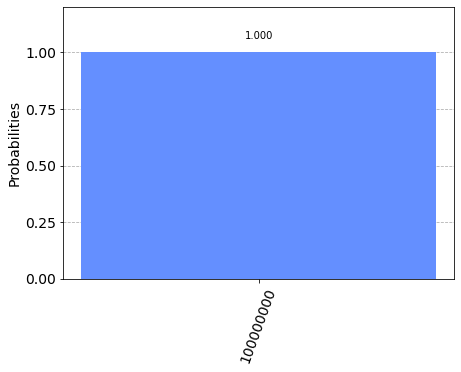

In [115]:
# lets execute again! 

counts = execute(complete_circuit,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


#### Analyzing our ouput

Now we see that our result is `1000000`, the bit we flipped was the 7th index, and since in qiskit the leading bit is the last index, we can see the result of our single bit flip in the 7th index as the first element now being 1. Again PERFECT RESULTS FROM A PERFECTLY SIMULATED MACHINE

#### Encoding any number 

Say we wanted to encode any value in this input, well firstly we are limited by the number of inputs, as we can only encode \[0, (2^n)-1), where n is the number of input bits.

If we wanted to encode some arbitrary number (or even strings and objects if you keep encoding consistent!) we would have to first make sure it falls with in our "encodable range", and then use our encoding scheme (in case of integers it would just be a conversion from base 10 to base 2) to create a bitstring and at the places that there exist 1 simply apply a not, or x, gate. 

In [116]:
def encode_bitstring(bits):
    '''
        This method takes in a bitstring and encodes it in our circuit
    '''
    
    n_qbits = len(bits)
    encoding_circuit = QuantumCircuit(n_qbits)
    
    # lets keep track of the bits we are gonna have to flip 
    flips = []

    # loop through the bitstring
    for i in range(len(lucky_number)):
        # check if we need to flip this position
        if lucky_number[i] == '1':
            # since ordering is backwards, we need a way to reverse index
            reverse = 1 + i
            flips.append(len(lucky_number) - reverse)

    # now we know which bits to flip, so lets get to flippin!
    for i in flips:
        encoding_circuit.x(i)

    return encoding_circuit


# choose a number! 
lucky_number = 420
# convert it to bits! 
lucky_number = str(bin(lucky_number))[2:]
print(lucky_number)

# create the encoding circuit 
encoding_circuit = encode_bitstring(lucky_number)
# draw it!
encoding_circuit.draw()



110100100


q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     ├───┤
q_8: ┤ X ├
     └───┘

### Creating a Half-Adder Circuit
Adder circuits are whats used for bitwise addition, that is, in base 2.

not gonna go to deep into bitwise addition as hopefully all are familiar but essentially we have 4 cases 

| bit operation| bit result| decimal analogue|
|---|------|---------------------------|
|0+0|  00 |(in decimal, this is 0+0=0)|
|0+1|  01 |(in decimal, this is 0+1=1)|
|1+0|  01 |(in decimal, this is 1+0=1)|
|1+1|  10 |(in decimal, this is 1+1=2)|


If our machine can implement this, and chain many in sequence, we can add anything 

**Note**: pay special attention to the cases that rightmost bit is changed, why might that be? 

In these cases, it is dependent on whether or not the bits are the same. This is just an exclusive or! 

####  C-Not Gate

In quantum, the job of XOR is done by the controlled-not. Applied to two qubits, one acts as the control qubit (the one with the little dot) and the target qubit (the one with the big circle). 

**In practice**: A C-Not does a NOT on the target if the control is 1, otherwise it does nothing.


#### Toffoli Gate

The Toffoli gate is really just an AND gate and is represented with `circuit.ccx(a,b, output)`. If we pay special attention to the cases again, we see that the only time we get an output with leftmost bit being 1 is when both inputs are 1. This means the AND gate is going to be really useful!

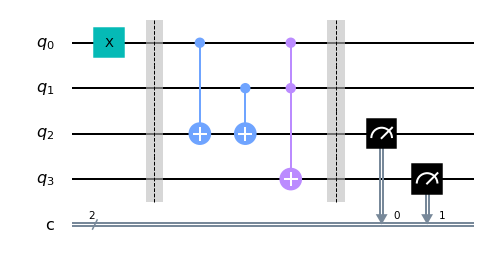

In [124]:
def half_adder(a, b): 
    ''' creates and returns a half-adder quantum circuit
        
        params:
            a(int): first bit to be added
            b(int): second bit to be added 
    '''
    
    def half_adder_input(a, b):
        ''' 
            encodes a and b into the part of the circuit based on their values.
        we are setting circuit up so we can add a and b
        '''
        # 2 outputs will be measured, but need 4 wires so we dont overwrite anythingr
        circuit = QuantumCircuit(4, 2)
        
        # encode 
        if (a == 1):
            circuit.x(0)
        if (b == 1):
            circuit.x(1)
        return circuit
    
    
    # encode inputs
    circuit = half_adder_input(a,b) 
    
    # visual barrier
    circuit.barrier()
    
    # use cnot to write the XOR of inputs on qubit 2 (rightmost bit)
    circuit.cx(0,2)
    circuit.cx(1,2)
    
    # use ccx to write the AND of the inputs on qubit 3 (leftmost bit)
    circuit.ccx(0,1,3)
    
    # visual barrier
    circuit.barrier()
    
    # extract outputs 
    circuit.measure(2,0)
    circuit.measure(3,1)
    
    return circuit 
    
    
        
circuit = half_adder(1,0)
circuit.draw("mpl")

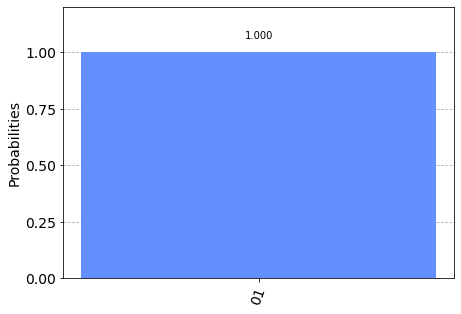

In [125]:
counts = execute(circuit,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)